# Introduction to Databricks

## Introduction

First, there were data warehouses. They stored data in rows and columns because all the Internet and computers of the time were capable of distributing was simple text information. Much later came data lakes - they could store nearly any type of data you could collect. They were great for the social media and YouTube age. 

But they both had disadvantages - data warehouses were expensive and unsuitable for modern data science while data lakes were messy and often turned into data swamps. So, companies started having two separate tech stacks - warehouses for BI and analytics, lakes for machine learning. 

But managing two different data architectures was such a pain that companies often had poor results. This issue gave rise to the __lakehouse architecture__, which is precisely what Databricks is famous for. 

Databricks is a cloud-based platform that allows users to derive value from both warehouses and lakes in a unified environment. This article will give overview of the platform, showing its most important features and how to use them.

## What we will cover in this tutorial?

Databricks is such a massive platform that its documentation itself could be turned into a book. So, the article's goal is to provide you with a concepts hierarchy - linearly ordered explanations of Databricks features that will take you from a clueless beginner to a decent Databricks practitioner. 

So, here is the table of contents:

PASTE THE TABLE OF CONTENTS HERE.

## 0. Databricks as a platform

When you read the word Databricks, you should immediately think of it as a platform, not as some framework or Python library. Typically, platforms offer a wide range of features and Databricks isn't an exception. It is one of the very few platforms that can be used by any data professional, from data engineers to the modern machine learning engineers (or what the press calls AI programmers). 

Databricks has the following core components:

1. Workspace: Databricks provides a centralized environment where teams can collaborate without any hassles. The environment is accessible through a user-friendly web interface.
2. Notebooks: Databricks has a version of Jupyter notebooks specifically designed for collaboration and flexibility.
3. Apache Spark: Databricks loves Apache Spark. It is the engine that powers all parallel processing of humongous datasets, making it suitable for big data analytics.
4. Delta Lake: an enhancement on data lakes by providing ACID transactions. Delta Lakes ensure data reliability and consistency, addressing traditional challenges associated with data lakes.
5. Scalability: the platform scales horizontally, rather than vertically, which is ideally suited for organizations dealing with ever-increasing data demands. 

These components in combination unlock a wide range of benefits:

- Cross-team collaboration: engineers, analysts, scientists and ML engineers can work seamlessly in the same platform.
- Consistency: with notebooks, users can transition between tasks and programming languages without the need for context-switching. 
- Efficient workflows: Users can perform tasks such as data cleaning, transformation and machine learning in a cohesive manner
- Integrated data management: users can ingest data into the platform multiple sources (a lakehouse), create tables and run SQL
- Real-time collaboration: shared notebooks and collaborative editing features enable real-time collaboration. Multiple team members can work on the same notebook simultaneously. 

If I've got you convinced of Databricks' importance in the data world, let's get you up and running with the platform. 

## 1. Account Setup

To set up you account, go to https://www.databricks.com/try-databricks and sign up for the Community Edition.

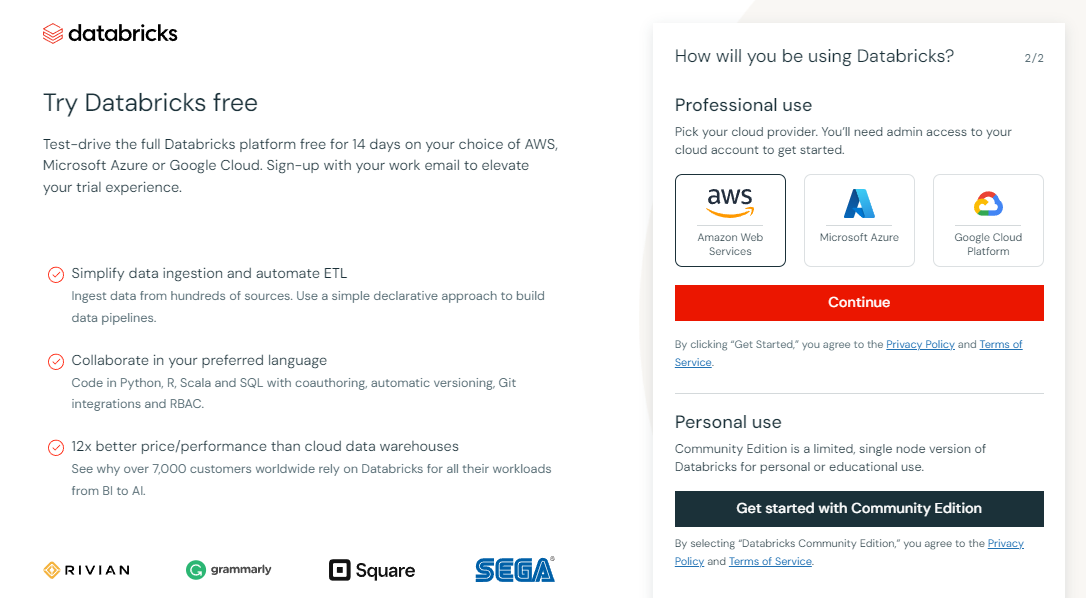

Community Edition has less features than the Enterprise version but it doesn't require a cloud-provider set up which is great for small-use cases like tutorials.

If you have this page after email verification, you are good to go:

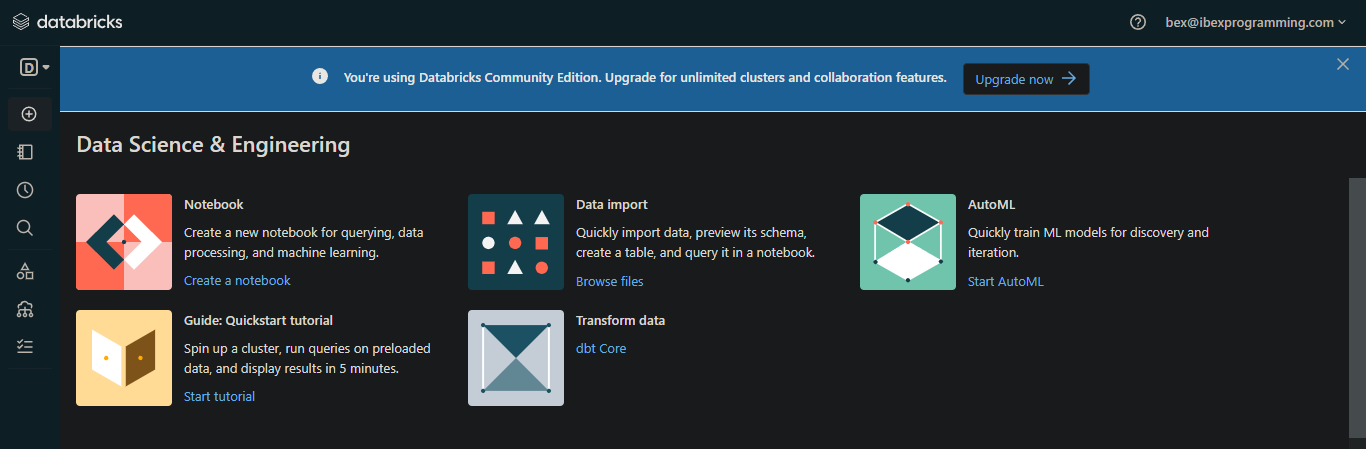

## 2. Databricks Workspace

The interface you discovered is the Workspace for your email address (the community edition workspace can always be found with [this link](https://community.cloud.databricks.com/)). In practice, usually an account admin from your company creates a single Databricks account and manage access to the workspace. 

Now, let's understand the UI of the platform. On the left panel, we have the menu for the different components Databricks offers. The enterprise version will have even more buttons:

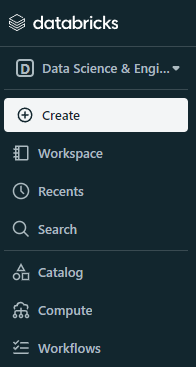

The first option in the menu is the type of the workspace, which is set to data science and engineering by default. If you can change it to machine learning, a new Experiments option pops up:

![](images/change_types.gif)

On the surface, it may look like it doesn't do much, but once you upgrade your account and start tinkering, you will notice some great features:
- Central hub for resources: notebooks, clusters, tables, libraries and dashboards
- Notebooks in multiple languages
- Cluster management: managing computational resources for the workspace to execute code
- Table management
- Dashboard creation: DB users have the ability to collect visuals into dashboards right in the workspace
- Collaborative real-time editing of notebooks
- Version control for notebooks
- Job scheduling (a powerful feature): users can execute notebooks and scripts at specified intervals

and so on. 

Now, let's look at each component more closely.

## 3. Databricks clusters

Clusters in databricks refer to the computational resources used to execute data processing tasks. Usually, clusters are provided by your chosen cloud provider during account set up. 

The community edition clusters are limited in RAM and CPU power and GPUs aren't included. However, premium users can often do the following tasks with clusters in a straightforward way:

- Data processing: Clusters are used to process and transform large volumes of data, using parallel processing powers of Spark.
- Machine learning: You can use Python (or any other language) and its libraries for model training and inference.
- ETL workflows: Clusters also support Extract, Transform, Load workflows by efficiently processing and transforming data from source to destination.

To create a cluster, you can use the "Create" button or the "Compute" options from the menu:

![](images/create_cluster.gif)

When creating the cluster, choose an appropriate Spark version for your environment. It usually takes a few minutes for clusters to become operational.

## 4. Databricks notebooks

Once you have a running cluster, you are ready to create notebooks. If you've worked with Jupyter, this will be familiar:

![](images/createa_notebook.gif)

But in a world where Jupyter exists, why would you go for something "similar to Jupyter"? Well, Databricks notebooks have the following advantages over Jupyter notebooks:

- Collaboration: Built-in collaborative features allow multiple users to work on the same notebook at the same time. Changes are tracked in real-time.
- Execution environment: Most Jupyter environment providers or local instances rely on single machines with predefined hardware. Users must install external libraries and dependencies. In contrast, Databricks notebooks are powered by clusters, which automatically handle resources and scaling by the workload.
- Integration with Big Data tech: Jupyter can work with Apache Spark but users need to manage Spark sessions and dependencies manually. Since Databricks was founded by Spark creators, it supports the framework natively. Spark sessions and clusters are managed by the Databricks platform.


There are many more advantages of Databricks notebooks over Jupyter, so here is a table summarizing the differences:
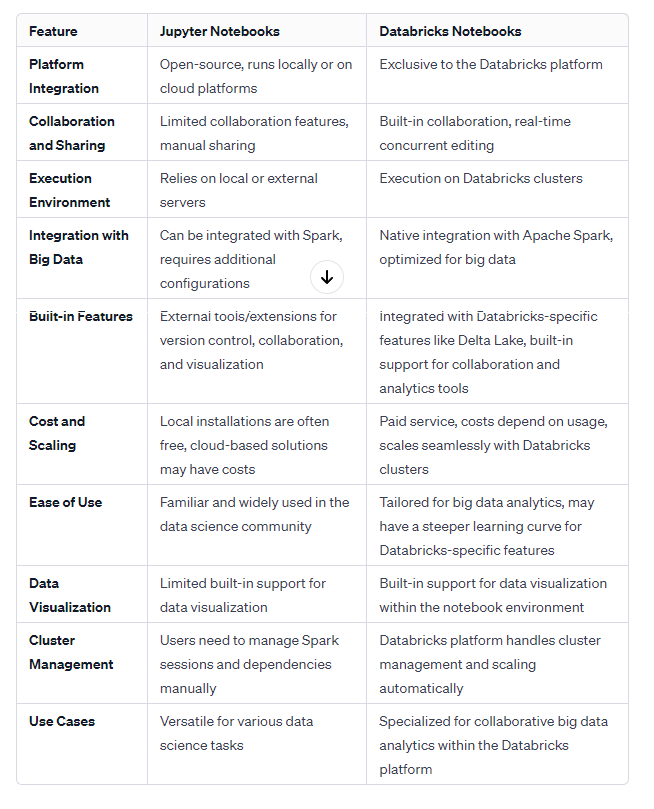

Ultimately, the above advantages of Databricks notebooks come into effect in specific use-cases. If you want to play around a CSV dataset with Pandas on your laptop, Jupyter is much better. 

But, for enterprise-level applications, Databricks as a platform may be a better option.

## 5. Data ingestion into Databricks

Data ingestion refers to the process of importing data from various sources. Databricks supports ingestion from a variety of sources including:
- AWS S3
- Azure Blob Storage
- Google Cloud Storage
- Relational databases (MySQL, PostgreSQL, etc.)
- Data lakes (Delta Lake, Parquet, Avro, etc.)
- Streaming platforms (Apache Kafka)
- Google BigQuery
- That local CSV file you have

and so on. 

Now, let's actually see how you can load certain types of data into Databricks. We will start with local files:



![](images/load_csv.gif)

Once you follow the steps in the GIF, you will have a file stored in the workspace. Here is how you can load it with Spark:

```python
# Importing necessary libraries
from pyspark.sql import SparkSession

# Creating a Spark session
spark = SparkSession.builder.appName("S3ImportExample").getOrCreate()

# Defining the CSV path to the data
path = "dbfs:/FileStore/tables/diamonds.csv"

# Reading data from S3 into a DataFrame
data_from_s3 = spark.read.csv(path, header=True, inferSchema=True)

# Displaying the imported data
data_from_s3.show()
```

Pay attention to the `dbfs:` prefix. All workspace files must include it for the file to be loaded correctly with Spark. 

Importing data from an S3 bucket is also similar (for enterprise accounts):

```python
# Importing necessary libraries
from pyspark.sql import SparkSession

# Creating a Spark session
spark = SparkSession.builder.appName("S3ImportExample").getOrCreate()

# Defining the S3 path to the data
s3_path = "s3://your-bucket/your-data.csv"

# Reading data from S3 into a DataFrame
data_from_s3 = spark.read.csv(s3_path, header=True, inferSchema=True)

# Displaying the imported data
data_from_s3.show()
```

For other types of data, you can check [the Data engineering](https://docs.databricks.com/en/workspace-index.html#) and [Connect to data sources](https://docs.databricks.com/en/connect/index.html) sections of the Databricks documentation.

## 6. Running SQL

When we uploaded the `diamonds.csv` file, it became a Databricks table in a database called default:

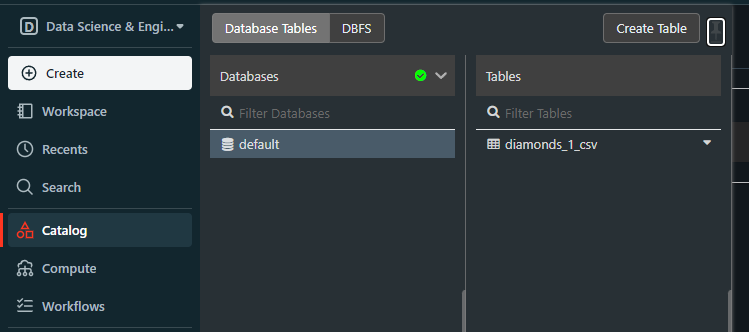

This `default` database is created whenever we try to load structured files without creating the database first.

OK, then - we've got a database. This means we can query it with SQL, not just with Spark. To do so, create a new notebook or change the language of the current notebook to SQL. Then, try the following code snippet:

```sql
SELECT * FROM default.diamonds_1_csv
LIMIT 5;
```

It must return the top five rows of the diamonds table:

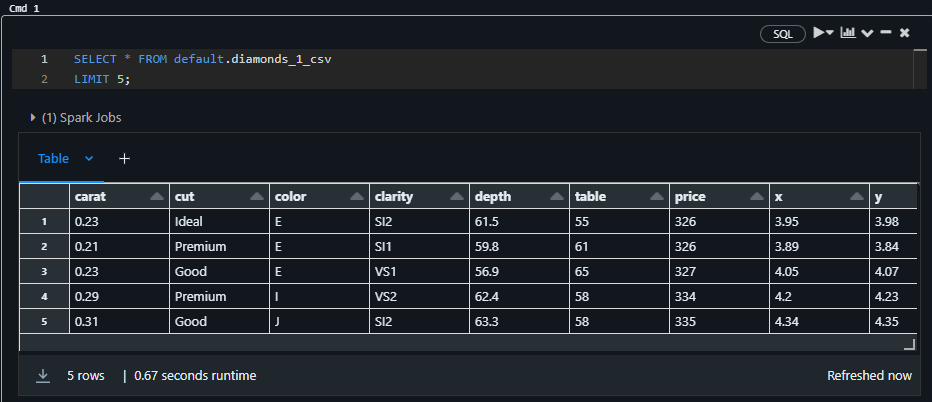

> Note: I am using an SQL notebook for the above snippet

You can load this table in Pandas as well. Within the same notebook, paste this snippet:

```python
%python
# Import the necessary libraries
import pandas as pd

# Assuming 'default' is the database name and 'diamonds' is the table name
# Use the spark.sql function to query the table and retrieve the data
table_df = spark.sql("SELECT * FROM default.diamonds_1_csv")

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = table_df.toPandas()

# Display the Pandas DataFrame
pandas_df.head()
```

It should print the head of the table:

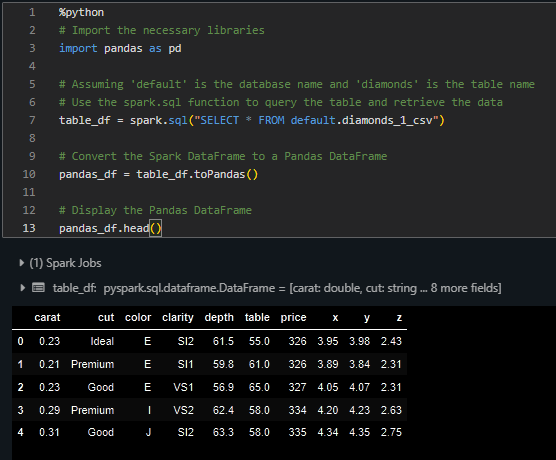

Now, you can do any typical data analysis task on the table with both SQL and Pandas.

## 9. Databricks Delta Lake

## 10. Data Visualization

## Conclusion